# WeatherPy
---------------------------------------------------------------------------------------------------------------------------
Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So we will be using Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"


We will be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Our Objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude


## <ins> Analysis </ins>

### <ins> Observed Trend 1 </ins>

### <ins> Observed Trend 2 </ins>

### <ins> Observed Trend 3 </ins>

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [41]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
Analysis_Date = pd.Timestamp('today').strftime('%m/%d/%Y')

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city = city.replace(" ","%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
#Base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
 
#Creating an empty list to store the API Data

City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

Record_Count = 1
Set_Count = 1

print("---------------------------------------------------")
print("            Beginning Data Retrieval")
print("---------------------------------------------------")

for city in cities:
    
    try:
        
        response = requests.get(base_url + "&q=" + city).json()
        City.append(response["name"])
        Cloudiness.append(response["clouds"]["all"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Wind_Speed.append(response["wind"]["speed"])
        City_Name = response["name"]
        print(f"Processing Record : {Record_Count} of Set {Set_Count} | {City_Name} |")    
        print(base_url + "&q=" + city)
        
        if Record_Count == 50:
            Record_Count = 1
            Set_Count = Set_Count + 1
        else :
            Record_Count = Record_Count + 1         
        
    except:
        
        print("City Not Found. Skipping...")
        
    continue

print("---------------------------------------------------")
print("            Data Retrieval Complete")
print("---------------------------------------------------")

#print(response)
#  {'coord': {'lon': 12.65, 'lat': 7.37}, 
#   'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}],
#   'base': 'stations', 
#   'main': {'temp': 66.94, 'pressure': 1013.09, 'humidity': 95, 'temp_min': 66.94, 'temp_max': 66.94, 
#   'sea_level': 1013.09, 'grnd_level': 920.47}, 'wind': {'speed': 0.69, 'deg': 114.228}, 
#   'rain': {'3h': 1.188}, 'clouds': {'all': 98}, 'dt': 1568855119, 
#   'sys': {'message': 0.0252, 'country': 'CM', 'sunrise': 1568869155, 'sunset': 1568912856},
#   'timezone': 3600, 'id': 2221513, 'name': 'Tignere', 'cod': 200}    

---------------------------------------------------
            Beginning Data Retrieval
---------------------------------------------------
Processing Record : 1 of Set 1 | Hermanus |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=hermanus
Processing Record : 2 of Set 1 | Wichita Falls |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=wichita%20falls
Processing Record : 3 of Set 1 | Hobart |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=hobart
Processing Record : 4 of Set 1 | Port Lincoln |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=port%20lincoln
Processing Record : 5 of Set 1 | Faanui |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=faanui
Processing Record : 6 of Set 1 | Bambous Virieux |
http://api.ope

Processing Record : 2 of Set 2 | Mikkeli |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=mikkeli
Processing Record : 3 of Set 2 | Cullinan |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=cullinan
Processing Record : 4 of Set 2 | Bogalusa |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=bogalusa
Processing Record : 5 of Set 2 | Mataura |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=mataura
Processing Record : 6 of Set 2 | Broome |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=broome
Processing Record : 7 of Set 2 | Veracruz |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=veracruz
Processing Record : 8 of Set 2 | Souillac |
http://api.openweathermap.or

Processing Record : 3 of Set 3 | Thompson |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=thompson
Processing Record : 4 of Set 3 | Airai |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=airai
Processing Record : 5 of Set 3 | Cabo San Lucas |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=cabo%20san%20lucas
Processing Record : 6 of Set 3 | Kaitangata |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=kaitangata
Processing Record : 7 of Set 3 | Sobolevo |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=sobolevo
Processing Record : 8 of Set 3 | Necochea |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=necochea
City Not Found. Skipping...
Processing Record : 9 

Processing Record : 4 of Set 4 | Sakaraha |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=sakaraha
Processing Record : 5 of Set 4 | Tura |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=tura
Processing Record : 6 of Set 4 | Kirakira |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=kirakira
Processing Record : 7 of Set 4 | Tuktoyaktuk |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=tuktoyaktuk
Processing Record : 8 of Set 4 | Zabol |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=zabol
Processing Record : 9 of Set 4 | Carmo do Paranaiba |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=carmo%20do%20paranaiba
Processing Record : 10 of Set 4 | Tadine |
http:

Processing Record : 5 of Set 5 | Salalah |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=salalah
City Not Found. Skipping...
Processing Record : 6 of Set 5 | Lebu |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=lebu
Processing Record : 7 of Set 5 | Tiksi |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=tiksi
City Not Found. Skipping...
Processing Record : 8 of Set 5 | Yertsevo |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=yertsevo
Processing Record : 9 of Set 5 | Port Elizabeth |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=port%20elizabeth
Processing Record : 10 of Set 5 | Khuzdar |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=khuzdar
Processing 

Processing Record : 7 of Set 6 | Wuan |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=wuan
Processing Record : 8 of Set 6 | Saint-Pierre |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=saint-pierre
Processing Record : 9 of Set 6 | Praia da Vitoria |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=praia%20da%20vitoria
Processing Record : 10 of Set 6 | Leh |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=leh
City Not Found. Skipping...
Processing Record : 11 of Set 6 | High Prairie |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=high%20prairie
Processing Record : 12 of Set 6 | Salinas |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=salinas
Processing Reco

Processing Record : 9 of Set 7 | Aquiraz |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=aquiraz
City Not Found. Skipping...
Processing Record : 10 of Set 7 | Coos Bay |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=coos%20bay
Processing Record : 11 of Set 7 | Dubti |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=dubti
City Not Found. Skipping...
Processing Record : 12 of Set 7 | Saint Anthony |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=saint%20anthony
Processing Record : 13 of Set 7 | Kouango |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=kouango
Processing Record : 14 of Set 7 | Dutlwe |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=dutlwe
Pro

Processing Record : 11 of Set 8 | Paamiut |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=paamiut
Processing Record : 12 of Set 8 | Mandalgovi |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=mandalgovi
Processing Record : 13 of Set 8 | Moscow |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=moscow
City Not Found. Skipping...
Processing Record : 14 of Set 8 | Rocha |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=rocha
Processing Record : 15 of Set 8 | San Isidro |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=san%20isidro
Processing Record : 16 of Set 8 | Pinsk |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=pinsk
Processing Record : 17 of Set 8 | Chil

Processing Record : 13 of Set 9 | Vestmannaeyjar |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=vestmannaeyjar
Processing Record : 14 of Set 9 | Xuddur |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=xuddur
Processing Record : 15 of Set 9 | Tuatapere |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=tuatapere
Processing Record : 16 of Set 9 | Sioux Lookout |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=sioux%20lookout
Processing Record : 17 of Set 9 | Tamandare |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=tamandare
Processing Record : 18 of Set 9 | Loukhi |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=loukhi
Processing Record : 19 of Set 9 | Bual

Processing Record : 14 of Set 10 | Banfora |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=banfora
Processing Record : 15 of Set 10 | Liberal |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=liberal
Processing Record : 16 of Set 10 | Faya |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=faya
Processing Record : 17 of Set 10 | Thiruvananthapuram |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=thiruvananthapuram
Processing Record : 18 of Set 10 | Smolyaninovo |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=smolyaninovo
Processing Record : 19 of Set 10 | Makakilo City |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=makakilo%20city
Processing Record : 20 o

Processing Record : 17 of Set 11 | Camacha |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=camacha
Processing Record : 18 of Set 11 | Awbari |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=awbari
Processing Record : 19 of Set 11 | Comodoro Rivadavia |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=comodoro%20rivadavia
Processing Record : 20 of Set 11 | Tupik |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=tupik
City Not Found. Skipping...
Processing Record : 21 of Set 11 | Salinopolis |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=salinopolis
Processing Record : 22 of Set 11 | Ravenna |
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=131ca4d95722dbcbdaceace95255f441&q=ravenna
City Not F

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
#Converting RawData to DataFrame
WeatherPy_df = pd.DataFrame({"City" : City, 
                             "Cloudiness" : Cloudiness, 
                             "Country" : Country, 
                             "Date" : Date, 
                             "Humidity" : Humidity, 
                             "Lat" : Lat, 
                             "Lng" : Lng, 
                             "Max Temp" : Max_Temp, 
                             "Wind Speed" : Wind_Speed})

#Display the Count of WeathePy Dataframe
WeatherPy_df.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [49]:
#Export the city data into a .csv.
WeatherPy_df.to_csv("Output City Data/Cities.csv")

In [55]:
#Preview of WeatherPy data
WeatherPy_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,0,ZA,1569228314,60,-34.42,19.24,64.00,1.99
1,Wichita Falls,90,US,1569228180,88,33.91,-98.49,75.20,9.17
2,Hobart,75,AU,1569228302,62,-42.88,147.33,51.80,3.36
3,Port Lincoln,24,AU,1569228353,63,-34.72,135.86,55.19,8.59
4,Faanui,0,PF,1569228353,84,-16.48,-151.75,80.03,16.42


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

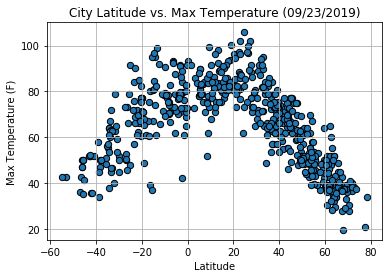

In [65]:
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], marker="o", edgecolors="black",s=40)

plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({Analysis_Date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Plotted Figures/Latitude_vs_Temperature")
plt.show()

### <ins> Observation </ins>

From the Latitude Vs Temperature Plot, we can infer that 

1) The temperatures are higher when they are close to the equator (Latitude Range : -20 to 25). 
2) The temperature are lower when they are away from the equator (Latitude Range : 60 to 80).

**Lower the Latitude --> Higher the Temperature
**Higher the Latitude --> Lower the Temperature

#### Latitude vs. Humidity Plot

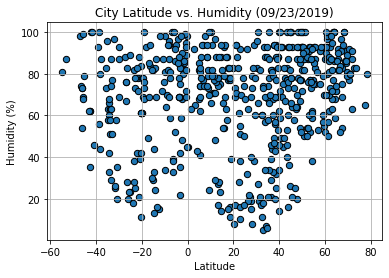

In [69]:
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], marker="o", edgecolors="black",s=40)

plt.grid()
plt.title(f"City Latitude vs. Humidity ({Analysis_Date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Plotted Figures/Latitude_vs_Humidity")
plt.show()

### <ins> Observation </ins>

In [ ]:
From the Latitude Vs Humidity Plot, we can infer that 

1) Humidity is reatively consistent across all the latitudes.
2) Correlation between Latitude and Humidity

#### Latitude vs. Cloudiness Plot

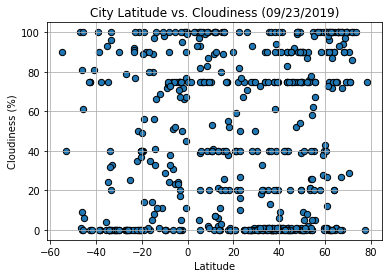

In [73]:
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], marker="o", edgecolors="black",s=40)

plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({Analysis_Date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Plotted Figures/Latitude_vs_Cloudiness")
plt.show()

### <ins> Observation </ins>

In [ ]:
From the Latitude Vs Cloudiness Plot, we can infer that 
1) Cloudiness is reatively consistent across all the latitudes

#### Latitude vs. Wind Speed Plot

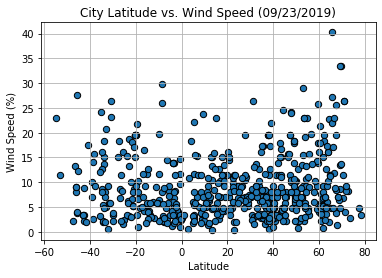

In [79]:
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], marker="o", edgecolors="black",s=40)

plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({Analysis_Date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

plt.savefig("Plotted Figures/Latitude_vs_WindSpeed")
plt.show()

### <ins> Observation </ins>

From the Latitude Vs Wind Speed Plot, we can infer that 
1) The highest wind speed outliers all occur at latitudes by the greatest distance from the equator.